***Public AI***
<br>
# 영상 처리의 어려움

### _Objective_
1. **DNN를 활용해 이미지 처리하기**: 기존 네트워크로 영상을 처리하기 어려운 이유에 대해 알아봅니다.
2. **동물이 사물의 형태를 인지하는 방법**: 동물이 사물의 형태를 인지하는 방법에 대해 알아봅니다.
3. **이미지의 특징**: 이미지의 특징에 대해 알아봅니다.
4. **이미지의 구조**: 이미지의 구조에 대해 알아봅니다.

  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model 
from tensorflow.keras.datasets import mnist

<br><br>

# \[ 1. DNN을 활용해 이미지 처리 하기 \]

----

Deep Neural Network로 영상 처리를 하기 어려운 점을 살펴보도록 하겠습니다. <br>
28x28의 작은 영상일지라도, 일렬로 펴면 784개만큼 됩니다. 영상을 처리한다는 것은 수많은 픽셀을 동시에 처리하는 문제입니다.

## 1. MNIST 데이터 가져오기

In [2]:
# mnist 가져오기
trainset, testset = mnist.load_data()
train_images, train_labels = trainset
test_images, test_labels = testset

train_images = train_images / 255.
test_images = test_images/ 255.

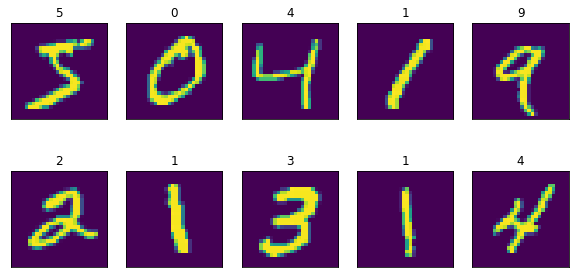

In [3]:
fig = plt.figure(figsize=(10,5))

for idx, (image, label) in enumerate(
    zip(train_images[:10], train_labels),1):
    ax = fig.add_subplot(2,5,idx)
    ax.set_title(label)
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.imshow(image)
plt.show()

## 2. DNN 모델 구성하기

3층짜리 딥러닝 모델을 구성하도록 하겠습니다.

* 첫번째 은닉층
    * 유닛 수 : 128
    * 활성화함수 : 'relu'
* 두번째 은닉층
    * 유닛 수 : 128
    * 활성화함수 : 'relu'
* 출력층
    * 유닛 수 : 클래스 수 
    * 활성화함수 : 'softmax'

In [ ]:
inputs = # 입력층 

# 은닉층

pred = # 출력층

model = Model(inputs, pred)

## 3. DNN 모델 컴파일하기

`Optimizer`, `Loss`, `Metrics`을 지정해주도록 합니다. <br>
라벨이 Index로 되어 있는 경우에는 `sparse_categorical_crossentropy`, <br>
One-Hot으로 되어 있는 경우에는 `categorical_crossentropy`를 이용해주도록 합니다.

In [ ]:
model.compile# 필요한 optimizer, loss, metrics를 각각 지정

## 4. 모델 학습시키기

배치 크기를 64, 에폭 크기를 10으로 두고 학습시키도록 하겠습니다.

In [ ]:
hist = model.fit# 학습데이터, 배치 크기, 에폭크기 각각지정

## 5. 모델을 통해 추론해보기

모델이 Test image를 각각 어떤식으로 분류하는지 확인해보도록 하겠습니다.

In [ ]:
samples = test_images[:10]
pred_probs = model.predict(samples)

확률값으로 나온 pred_probs 중에서 라벨을 가져와 보도록 하겠습니다.

In [ ]:
pred_label = # pred_probs에서 확률값이 가장 큰 값의 인덱스 가져오기

In [ ]:
fig = plt.figure(figsize=(10,5))

for idx, (image, label) in enumerate(
    zip(samples, pred_label),1):
    ax = fig.add_subplot(2,5,idx)
    ax.set_title(label)
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.imshow(image)
plt.show()

## 5. Image을 DNN 모델로 했을 때의 문제점

<img src="https://i.imgur.com/9Ax40I0.jpg" width="400">

이미지를 구별하기 위해 필요하지 않는 정보들을 weights 에 연결해야 해 weights 갯수가 많이 필요하다는 단점이 있습니다. 영상이 커질수록 필요한 Weights의 수는 기하급수적으로 많아집니다

### (1) (64, 64) 크기의 영상에서 필요한 Parameter 수

이미지 영상을 유닛이 100개인 Dense Layer에 연결하면 몇개의 Parameter가 필요할까요?

In [ ]:
# (64 , 64) 크기의 RGB 채널을 가진 영상
inputs = Input(shape=(64, 64, 3))

flat = Flatten()(inputs)
out = #
model = Model(inputs, out)

model.summary()

### (2) (1280, 720) 크기의 영상에서 필요한 Parameter 수

이미지 영상을 유닛이 100개인 Dense Layer에 연결하면 몇개의 Parameter가 필요할까요?

In [ ]:
inputs = Input(shape=(1280, 720, 3))

flat = Flatten()(inputs)
out = #
model = Model(inputs, out)

model.summary()

# \[ 2. 우리가 사물의 형태를 인지하는 방법 \]
---

동물들은 간단한 저차원 (점, 선) 특징들을 추출한 후 추출된 특징들을 조합해 점차 복잡한 이미지를 구성합니다. <br>
우리의 시각 피질은 점, 선, 면과 같은 단순한 패턴들을 조합하여 고차원의 특징을 파악하게 됩니다.

[Receptive fields of single neurones in the cat's striate cortex
D. H. Hubel and T. N. Wiesel](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1363130/)

![Imgur](https://i.imgur.com/pwaveif.jpg)

# \[ 3. 이미지의 특징 \]
---
![Imgur](https://i.imgur.com/FgoyoPW.png)
- 이미지는 픽셀과 인접해 있는 픽셀간의 값의 차이를 통해 이미지의 특징을 표현할수 있습니다.
- 국소적인 특징들을 조합해 복잡한 특징들을 나타낼수 있습니다.

# \[ 4. 이미지의 구조 \]
----

이미지가 어떻게 컴퓨터에서 보여지고 구조화 되어 있는지 확인해 보겠습니다.

**컴퓨터 비전**은 컴퓨터를 이용하여 정지영상 또는 동영상으로부터 의미있는 정보를 추출하는 방법을 연구하는 학문입니다. 이미지를 분석하기 위해선 그에 대한 정보가 필요하기 때문입니다. 컴퓨터 비전을 간단하게 정리하면 사람이 눈으로 보고 인지하는 작업을 컴퓨터가 동등하게 수행할 수 있게끔 연구하는 학문이라고 할 수 있습니다. 이런 작업이 우리에게 왜 필요할까요?

컴퓨터 비전은 이미지로부터 의미있는 정보를 추출하는 것을 다룹니다. 사람이 사물을 보고 무엇인지 인지하고 그에 대한 정보를 추출하는 것은 매우 쉬운 작업이지만, 컴퓨터가 사물을 인식할 수 있도록 하는 일은 매우 어렵습니다. 이를 예시를 통해 살펴보겠습니다.

![](https://i.imgur.com/0UOiXGp.png)

우리 인간은 눈으로 사과와 토마토를 각각 인식할 수 있습니다. 그러나 컴퓨터의 경우는 인간의 경우와 전혀 다릅니다. <br>
첫번째 그림과 같은 사과 사진을 컴퓨터의 input으로 주고, 이 사진의 객체를 사과라고 인식하는 문제에 대해 생각해 보겠습니다. 흰 배경을 제외한 가운데 영역에 빨간색 성분이 많이 있고 둥근 윤곽을 가지면 사과라고 인식하게끔 프로그램을 만들면 빨간 사과를 인식할 수 있을 것입니다. 그러나 두번째 그림처럼 초록색 사과도 함께 인식해야 한다면 사과의 색상정보에 초록색도 추가해야 합니다. 만약 세번째 그림처럼 빨간색 토마토가 입력으로 들어오면 상황은 더 복잡해집니다. 색상정보와 윤곽선 정보만으로는 사과와 토마토가 구분이 되지 않으므로 꼭지의 모양까지 고려해야 합니다. 네번째 그림처럼 배경이 단순하지 않고 여러 과일이 겹쳐 있는 경우에는 인식이 더더욱 어려워지겠죠. 

이러한 문제들을 컴퓨터 비전에서는 영상으로부터 유용한 정보를 추출하고, 이를 조합하여 결과를 유추합니다. 컴퓨터 비전에서 주로 사용하는 영상정보는 밝기, 색상, 모양 등이 있으며, 이러한 정보와 머신러닝, 딥러닝 알고리즘을 함께 사용하여 사물을 인지할 수 있습니다. 그러나 영상으로부터 이러한 정보들을 추출하는 것은 쉬운일이 아닙니다. 예를들어 배경과 객체를 어떻게 구분해야 하는지, 빨간색을 판단하기 위해서는 어떤 수식을 사용해야 하는지, 둥근 윤곽을 판단하기 위해서는 어떤 알고리즘을 사용해야 하는지 등을 결정하는 것은 쉬운 문제가 아닙니다. 앞으로 수업시간에는 영상으로부터 유용한 정보를 추출하는 방법과 추출된 정보를 효과적으로 사용하는 방법들에 대해 다루게 될것입니다.

## What is Image?

아래 이미지는 조르주 쇠라의 '그랑트 자트 섬의 센 강, 봄' 입니다. 인상주의 이후 선보인 '점묘법'에 의해 그려진 그림으로, 자잘한 점을 캔버스 표면에 나란히 찍어가며 풍경을 묘사하고 있습니다. 

![](https://gscaltexmediahub.com/wp-content/uploads/2018/10/GSC_BS_MH_gs-calender-2019-04_20181026_01.jpg)

컴퓨터가 이미지를 이해하는 **픽셀**의 아이디어가 위와 같은 점묘법에서 출발했습니다. 여기서 픽셀은 이미지를 이루는 낱낱의 점들을 말하고, 하나의 픽셀은 하나의 밝기 또는 색상을 표현하며, 이러한 픽셀이 모여서 2차원 영상을 구성합니다. 컴퓨터는 이미지를 가장 먼저 픽셀로 이해하며, 이 픽셀은 일련의 숫자로 그 값을 표시합니다. 예를들어 컴퓨터의 입장에서 1024 * 768의 해상도를 가진 이미지는 1024 * 768 = 786432개의 점, 즉 786432개의 픽셀을 포함하는 1024개의 열과 768 개의 행이 있는 **행렬형태**로 존재하게 됩니다.

![](https://i.imgur.com/goyV2hO.png)

컴퓨터 비전에서는 주로 grayscale image와 truecolor image를 사용합니다. Grayscale image는 흑백 영상과 같이 밝기 정보로만 구성된 영상을 의미하고, 회색조 영상이라고도 합니다. 반면에 다양한 색상을 표현할 수 있는 영상을 컬러 영상이라고합니다. 그레이스케일 영상은 밝기 정보를 256단계로 구분하여 표현합니다. 그레이스케일 영상에서 하나의 픽셀은 0부터 255사이의 정수 값으로 256단계를 표현합니다. 가장 밝음을 나타내는 255에서, 빛이 없음을 나타내는 0까지의 그라데이션으로 밝기를 표현합니다. 컬러영상은 기본적으로 R, G, B 세 개의 색상 성분 조합으로 픽셀 값을 표현합니다. 한 픽셀당 R채널, G채널, B채널의 각각의 배열에, 각각의 색상 성분은 0부터 255사이의 정수 값으로 표현되며 이들의 조합으로 이미지의 색을 나타냅니다.

![](https://i.imgur.com/XiWSz2n.png)

---
⊙ Copyright(c) 2020 by PublicAI. All rights reserved <br>
All pictures, codes, writings cannot be copied without permission. <br>
Writen by PAI(info@publicai.co.kr) <br>
last updated on 2020/01/4 <br>
